In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
columns = ["age", "workClass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship", "race", "sex", 
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]


## Quelques informations descriptives


In [3]:
df = pd.read_csv('adult.data', sep=",", names=columns, na_values='?')
df.drop_duplicates(inplace=True)
df

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workClass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.replace(' *','', regex=True, inplace=True)
df

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df['capital-gain'].value_counts()

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [8]:
df['capital-loss'].value_counts()

0       31018
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

## Visualisation graphique

<AxesSubplot:>

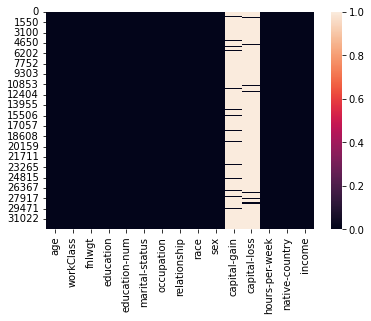

In [9]:
sns.heatmap(df==0)

In [10]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


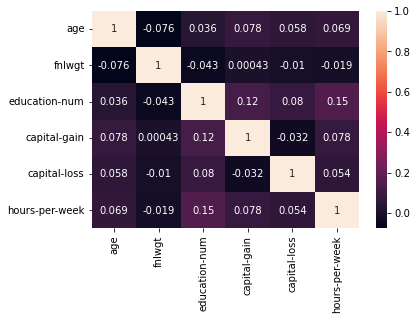

In [11]:
sns.heatmap(df.corr(), annot=True);

Selon le heatmap ci-dessus, nous constatons qu'il y a peu de corrélation entre les différents variables numériques.

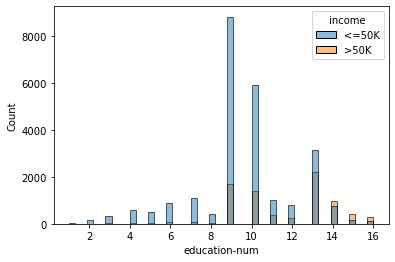

In [12]:
sns.histplot(data=df, x='education-num', hue='income', bins=50);

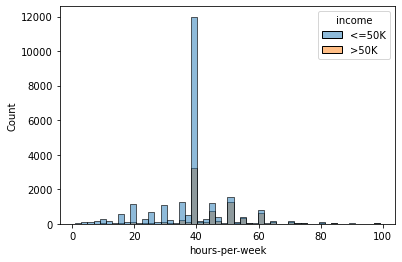

In [13]:
sns.histplot(data=df, x='hours-per-week', hue='income', bins=50);

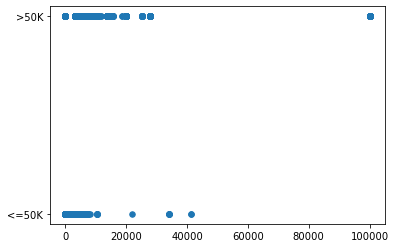

In [14]:
plt.scatter( df['capital-gain'], df['income'], s=30);

In [15]:
#sns.pairplot(data=df, hue='income');

La variable "capital-gain" semble plutôt corrélée avec l'âge, le nombre d'année d'études et le nombre d'heures travaillées par semaine.

In [16]:
sum(df['income'].isnull())

0

In [17]:
df.dropna(axis = 0, subset = columns)

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [18]:
df.race.value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [19]:
new_genres = pd.Series(df.race)
new_list = []
for mot in new_genres:
    new_list.append(mot.split("-"))

last_list = []
for mot in new_list:
    last_list.append(mot[0])
last_list[0:15]

['White',
 'White',
 'White',
 'Black',
 'Black',
 'White',
 'Black',
 'White',
 'White',
 'White',
 'Black',
 'Asian',
 'White',
 'Black',
 'Asian']

In [20]:
df['new_race'] = last_list
df.drop(["race"], axis='columns', inplace=True)
df

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K,White
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K,White
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K,White
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K,Black
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K,White
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K,White
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K,White
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K,White


In [21]:
def regroupe(row):
    if row['new_race'] == 'Amer':
        return 'Others_race'
    elif row['new_race'] == 'Asian':
        return 'Asian'
    elif row['new_race'] == 'Black':
        return 'Black'
    elif row['new_race'] == 'Other':
        return 'Others_race'
    elif row['new_race'] == 'White': 
        return 'White'
    else:
        return row['new_race']


df['new_race2'] = df.apply(regroupe, axis=1)

In [22]:
df.new_race2.value_counts()

White          27795
Black           3122
Asian           1038
Others_race      582
Name: new_race2, dtype: int64

In [23]:
df['new_race'].str.count(' ')

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: new_race, Length: 32537, dtype: int64

In [24]:
row_example =df.iloc[4]
regroupe(row_example)
row_example

age                               28
workClass                    Private
fnlwgt                        338409
education                  Bachelors
education-num                     13
marital-status    Married-civ-spouse
occupation            Prof-specialty
relationship                    Wife
sex                           Female
capital-gain                       0
capital-loss                       0
hours-per-week                    40
native-country                  Cuba
income                         <=50K
new_race                       Black
new_race2                      Black
Name: 4, dtype: object

In [25]:
df['marital-status'].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [26]:
def regroupe(row):
    if row['marital-status'] in ['Divorced','Separated', 'Widowed']:
        return 'Alone'
    elif row['marital-status'] == 'Married-civ-spouse':
        return 'Married-civ-spouse'
    elif row['marital-status'] == 'Never-married':
        return 'Never-married'
    elif row['marital-status'] in ['Married-spouse-absent', 'Married-AF-spouse']:
        return 'Others_marital'
    else:
        return row['marital-status']

df['marital-status2'] = df.apply(regroupe, axis=1)

In [27]:
df['marital-status2'].value_counts()

Married-civ-spouse    14970
Never-married         10667
Alone                  6459
Others_marital          441
Name: marital-status2, dtype: int64

In [28]:
df.drop(['new_race','marital-status', 'education','fnlwgt'], axis=1, inplace=True)
df

,age,workClass,education-num,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race2,marital-status2
0,39,State-gov,13,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K,White,Never-married
1,50,Self-emp-not-inc,13,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K,White,Married-civ-spouse
2,38,Private,9,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K,White,Alone
3,53,Private,7,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K,Black,Married-civ-spouse
4,28,Private,13,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K,Black,Married-civ-spouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Tech-support,Wife,Female,0,0,38,United-States,<=50K,White,Married-civ-spouse
32557,40,Private,9,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K,White,Married-civ-spouse
32558,58,Private,9,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K,White,Alone
32559,22,Private,9,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K,White,Never-married


In [29]:
df = df[(df["occupation"] != '?')]
df = df[(df["workClass"] != '?')]
df = df[(df['native-country'] != '?')]
df

,age,workClass,education-num,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race2,marital-status2
0,39,State-gov,13,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K,White,Never-married
1,50,Self-emp-not-inc,13,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K,White,Married-civ-spouse
2,38,Private,9,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K,White,Alone
3,53,Private,7,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K,Black,Married-civ-spouse
4,28,Private,13,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K,Black,Married-civ-spouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Tech-support,Wife,Female,0,0,38,United-States,<=50K,White,Married-civ-spouse
32557,40,Private,9,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K,White,Married-civ-spouse
32558,58,Private,9,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K,White,Alone
32559,22,Private,9,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K,White,Never-married


In [30]:
df.income.value_counts()

<=50K    22633
>50K      7506
Name: income, dtype: int64

In [31]:
df.occupation.value_counts()

Prof-specialty       4034
Craft-repair         4025
Exec-managerial      3991
Adm-clerical         3719
Sales                3584
Other-service        3209
Machine-op-inspct    1964
Transport-moving     1572
Handlers-cleaners    1349
Farming-fishing       987
Tech-support          911
Protective-serv       644
Priv-house-serv       141
Armed-Forces            9
Name: occupation, dtype: int64

In [32]:
def regroupe(row):
    if row['workClass'] == 'Private':
        return 'Private'
    elif row['workClass'] in ['Local-gov', 'State-gov','Federal-gov']:
        return 'Public'
    elif row['workClass'] in ['Self-emp-not-inc', 'Self-emp-inc']:
        return 'Self-emp'
    elif row['workClass'] == 'Without-pay':
        return 'Without-pay'
    else:
        return row['workClass']

df['workClass'] = df.apply(regroupe, axis=1)

In [33]:
df.workClass.value_counts()

Private        22264
Public          4289
Self-emp        3572
Without-pay       14
Name: workClass, dtype: int64

In [34]:
df.sex.value_counts()

Male      20366
Female     9773
Name: sex, dtype: int64

In [35]:
df.relationship.value_counts()

Husband           12457
Not-in-family      7714
Own-child          4462
Unmarried          3211
Wife               1406
Other-relative      889
Name: relationship, dtype: int64

In [36]:
df['native-country'].value_counts()

United-States                 27487
Mexico                          606
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [37]:
def regroupe(row):
    if row['native-country'] == 'United-States':
        return 'United-States'
    elif row['native-country'] in ['Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands']:
        return 'Others_country'
    else:
        return row['native-country']

df['native-country'] = df.apply(regroupe, axis=1)

In [38]:
df = pd.concat((df.drop('sex', axis=1), pd.get_dummies(df.sex, drop_first=True)), axis=1)
df

,age,workClass,education-num,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income,new_race2,marital-status2,Male
0,39,Public,13,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K,White,Never-married,1
1,50,Self-emp,13,Exec-managerial,Husband,0,0,13,United-States,<=50K,White,Married-civ-spouse,1
2,38,Private,9,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K,White,Alone,1
3,53,Private,7,Handlers-cleaners,Husband,0,0,40,United-States,<=50K,Black,Married-civ-spouse,1
4,28,Private,13,Prof-specialty,Wife,0,0,40,Others_country,<=50K,Black,Married-civ-spouse,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Tech-support,Wife,0,0,38,United-States,<=50K,White,Married-civ-spouse,0
32557,40,Private,9,Machine-op-inspct,Husband,0,0,40,United-States,>50K,White,Married-civ-spouse,1
32558,58,Private,9,Adm-clerical,Unmarried,0,0,40,United-States,<=50K,White,Alone,0
32559,22,Private,9,Adm-clerical,Own-child,0,0,20,United-States,<=50K,White,Never-married,1


## Création des dummies

In [39]:
df = pd.concat((df.drop('new_race2', axis=1), pd.get_dummies(df['new_race2'], drop_first=True)), axis=1)
df = pd.concat((df.drop('workClass', axis=1), pd.get_dummies(df['workClass'], drop_first=True)), axis=1)
df =  pd.concat((df.drop('occupation', axis=1), pd.get_dummies(df['occupation'], drop_first=True)), axis=1)
df =  pd.concat((df.drop('relationship', axis=1), pd.get_dummies(df['relationship'], drop_first=True)), axis=1)
df =  pd.concat((df.drop('native-country', axis=1), pd.get_dummies(df['native-country'], drop_first=True)), axis=1)
df =  pd.concat((df.drop('marital-status2', axis=1), pd.get_dummies(df['marital-status2'], drop_first=True)), axis=1)
df

,age,education-num,capital-gain,capital-loss,hours-per-week,income,Male,Black,Others_race,White,...,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,United-States,Married-civ-spouse,Never-married,Others_marital
0,39,13,2174,0,40,<=50K,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1,50,13,0,0,13,<=50K,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
2,38,9,0,0,40,<=50K,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,53,7,0,0,40,<=50K,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,28,13,0,0,40,<=50K,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,<=50K,0,0,0,1,...,0,0,0,0,0,1,1,1,0,0
32557,40,9,0,0,40,>50K,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
32558,58,9,0,0,40,<=50K,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
32559,22,9,0,0,20,<=50K,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [40]:
y_train = df.loc[:,'income']
y_train

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, Length: 30139, dtype: object

In [41]:
X_train = df.drop('income', axis=1)
X_train

,age,education-num,capital-gain,capital-loss,hours-per-week,Male,Black,Others_race,White,Public,...,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,United-States,Married-civ-spouse,Never-married,Others_marital
0,39,13,2174,0,40,1,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
1,50,13,0,0,13,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,38,9,0,0,40,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,53,7,0,0,40,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0
32557,40,9,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
32558,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
32559,22,9,0,0,20,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


X_train EST FAIT , ET y_train EST FAIT!!!!!!!

In [42]:
df2 = pd.read_csv('adult.test', sep=",", names=columns)
df2

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16282 non-null  object 
 1   workClass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [44]:
sum(df2['income'].isnull())

1

In [45]:
df2.dropna(axis = 0, subset = columns)

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [46]:
columns = ["age", "workClass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship", "race", "sex", 
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

In [47]:
X_test = pd.read_csv('adult.test', sep=",", names=columns, na_values='?')
X_test

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [48]:
X_test.replace(' *','', regex=True, inplace=True)

In [49]:
X_test.dropna(axis = 0, subset = columns)

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [50]:
X_test.race.value_counts()

White                 13946
Black                  1561
Asian-Pac-Islander      480
Amer-Indian-Eskimo      159
Other                   135
Name: race, dtype: int64

In [51]:
def regroupe(row):
    if row['race'] == 'Amer-Indian-Eskimo':
        return 'Others_race'
    elif row['race'] == 'Asian-Pac-Islander':
        return 'Asian'
    elif row['race'] == 'Black':
        return 'Black'
    elif row['race'] == 'Other':
        return 'Others_race'
    elif row['race'] == 'White': 
        return 'White'
    else:
        return row['race']


X_test['new_race2'] = X_test.apply(regroupe, axis=1)

In [52]:
X_test

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race2
0,|1x3Crossvalidator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.,Black
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,White
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.,White
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.,White
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.,Black
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,White
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.,Asian


In [53]:
X_test["new_race2"].value_counts()

White          13946
Black           1561
Asian            480
Others_race      294
Name: new_race2, dtype: int64

In [54]:
X_test.drop([0], axis="index", inplace=True)
X_test

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race2
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.,Black
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,White
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.,White
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.,Black
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.,White
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.,Black
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,White
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.,Asian


In [55]:
def regroupe(row):
    if row['marital-status'] in ['Divorced','Separated', 'Widowed']:
        return 'Alone'
    elif row['marital-status'] == 'Married-civ-spouse':
        return 'Married-civ-spouse'
    elif row['marital-status'] == 'Never-married':
        return 'Never-married'
    elif row['marital-status'] in ['Married-spouse-absent', 'Married-AF-spouse']:
        return 'Others_marital'
    else:
        return row['marital-status']

X_test['marital-status2'] = X_test.apply(regroupe, axis=1)

In [56]:
X_test

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race2,marital-status2
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.,Black,Never-married
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,White,Married-civ-spouse
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.,White,Married-civ-spouse
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.,Black,Married-civ-spouse
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.,White,Never-married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.,White,Alone
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.,Black,Alone
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,White,Married-civ-spouse
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.,Asian,Alone


## Suppression des colonnes 

In [57]:
X_test.drop(['education','fnlwgt','marital-status'], axis=1, inplace=True)

In [58]:
X_test = X_test[(X_test["occupation"] != '?')]
X_test = X_test[(X_test["workClass"] != '?')]
X_test = X_test[(X_test['native-country'] != '?')]
X_test

,age,workClass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race2,marital-status2
1,25,Private,7.0,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.,Black,Never-married
2,38,Private,9.0,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,White,Married-civ-spouse
3,28,Local-gov,12.0,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.,White,Married-civ-spouse
4,44,Private,10.0,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.,Black,Married-civ-spouse
6,34,Private,6.0,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.,White,Never-married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,Private,13.0,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.,White,Never-married
16277,39,Private,13.0,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.,White,Alone
16279,38,Private,13.0,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,White,Married-civ-spouse
16280,44,Private,13.0,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.,Asian,Alone


In [59]:
def regroupe(row):
    if row['workClass'] == 'Private':
        return 'Private'
    elif row['workClass'] in ['Local-gov', 'State-gov','Federal-gov']:
        return 'Public'
    elif row['workClass'] in ['Self-emp-not-inc', 'Self-emp-inc']:
        return 'Self-emp'
    elif row['workClass'] == 'Without-pay':
        return 'Without-pay'
    else:
        return row['workClass']

X_test['workClass'] = X_test.apply(regroupe, axis=1)

In [60]:
X_test

,age,workClass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race2,marital-status2
1,25,Private,7.0,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.,Black,Never-married
2,38,Private,9.0,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,White,Married-civ-spouse
3,28,Public,12.0,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.,White,Married-civ-spouse
4,44,Private,10.0,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.,Black,Married-civ-spouse
6,34,Private,6.0,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.,White,Never-married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,Private,13.0,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.,White,Never-married
16277,39,Private,13.0,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.,White,Alone
16279,38,Private,13.0,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,White,Married-civ-spouse
16280,44,Private,13.0,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.,Asian,Alone


In [61]:
def regroupe(row):
    if row['native-country'] == 'United-States':
        return 'United-States'
    elif row['native-country'] in ['Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands']:
        return 'Others_country'
    else:
        return row['native-country']

X_test['native-country'] = X_test.apply(regroupe, axis=1)

In [62]:
X_test

,age,workClass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race2,marital-status2
1,25,Private,7.0,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.,Black,Never-married
2,38,Private,9.0,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,White,Married-civ-spouse
3,28,Public,12.0,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.,White,Married-civ-spouse
4,44,Private,10.0,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.,Black,Married-civ-spouse
6,34,Private,6.0,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.,White,Never-married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,Private,13.0,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.,White,Never-married
16277,39,Private,13.0,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.,White,Alone
16279,38,Private,13.0,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,White,Married-civ-spouse
16280,44,Private,13.0,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.,Asian,Alone


## Création des dummies

In [63]:
X_test = pd.concat((X_test.drop('sex', axis=1), pd.get_dummies(X_test.sex, drop_first=True)), axis=1)

In [64]:
X_test

,age,workClass,education-num,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,new_race2,marital-status2,Male
1,25,Private,7.0,Machine-op-inspct,Own-child,Black,0.0,0.0,40.0,United-States,<=50K.,Black,Never-married,1
2,38,Private,9.0,Farming-fishing,Husband,White,0.0,0.0,50.0,United-States,<=50K.,White,Married-civ-spouse,1
3,28,Public,12.0,Protective-serv,Husband,White,0.0,0.0,40.0,United-States,>50K.,White,Married-civ-spouse,1
4,44,Private,10.0,Machine-op-inspct,Husband,Black,7688.0,0.0,40.0,United-States,>50K.,Black,Married-civ-spouse,1
6,34,Private,6.0,Other-service,Not-in-family,White,0.0,0.0,30.0,United-States,<=50K.,White,Never-married,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,Private,13.0,Prof-specialty,Own-child,White,0.0,0.0,40.0,United-States,<=50K.,White,Never-married,1
16277,39,Private,13.0,Prof-specialty,Not-in-family,White,0.0,0.0,36.0,United-States,<=50K.,White,Alone,0
16279,38,Private,13.0,Prof-specialty,Husband,White,0.0,0.0,50.0,United-States,<=50K.,White,Married-civ-spouse,1
16280,44,Private,13.0,Adm-clerical,Own-child,Asian-Pac-Islander,5455.0,0.0,40.0,United-States,<=50K.,Asian,Alone,1


In [65]:
X_test = pd.concat((X_test.drop('new_race2', axis=1), pd.get_dummies(X_test['new_race2'], drop_first=True)), axis=1)
X_test = pd.concat((X_test.drop('workClass', axis=1), pd.get_dummies(X_test['workClass'], drop_first=True)), axis=1)
X_test =  pd.concat((X_test.drop('occupation', axis=1), pd.get_dummies(X_test['occupation'], drop_first=True)), axis=1)
X_test =  pd.concat((X_test.drop('relationship', axis=1), pd.get_dummies(X_test['relationship'], drop_first=True)), axis=1)
X_test =  pd.concat((X_test.drop('native-country', axis=1), pd.get_dummies(X_test['native-country'], drop_first=True)), axis=1)
X_test =  pd.concat((X_test.drop('marital-status2', axis=1), pd.get_dummies(X_test['marital-status2'], drop_first=True)), axis=1)
X_test

,age,education-num,race,capital-gain,capital-loss,hours-per-week,income,Male,Black,Others_race,...,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,United-States,Married-civ-spouse,Never-married,Others_marital
1,25,7.0,Black,0.0,0.0,40.0,<=50K.,1,1,0,...,0,0,0,1,0,0,1,0,1,0
2,38,9.0,White,0.0,0.0,50.0,<=50K.,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,28,12.0,White,0.0,0.0,40.0,>50K.,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,44,10.0,Black,7688.0,0.0,40.0,>50K.,1,1,0,...,0,0,0,0,0,0,1,1,0,0
6,34,6.0,White,0.0,0.0,30.0,<=50K.,1,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,13.0,White,0.0,0.0,40.0,<=50K.,1,0,0,...,0,0,0,1,0,0,1,0,1,0
16277,39,13.0,White,0.0,0.0,36.0,<=50K.,0,0,0,...,0,1,0,0,0,0,1,0,0,0
16279,38,13.0,White,0.0,0.0,50.0,<=50K.,1,0,0,...,0,0,0,0,0,0,1,1,0,0
16280,44,13.0,Asian-Pac-Islander,5455.0,0.0,40.0,<=50K.,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [66]:
new_genres3 = pd.Series(X_test.income)
new_list3 = []
for mot in new_genres3:
    new_list3.append(mot.split("."))

last_list3 = []
for mot in new_list3:
    last_list3.append(mot[0])
last_list3[0:15]

['<=50K',
 '<=50K',
 '>50K',
 '>50K',
 '<=50K',
 '>50K',
 '<=50K',
 '<=50K',
 '>50K',
 '<=50K',
 '<=50K',
 '>50K',
 '>50K',
 '<=50K',
 '<=50K']

In [67]:
X_test['income'] = last_list3
X_test

,age,education-num,race,capital-gain,capital-loss,hours-per-week,income,Male,Black,Others_race,...,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,United-States,Married-civ-spouse,Never-married,Others_marital
1,25,7.0,Black,0.0,0.0,40.0,<=50K,1,1,0,...,0,0,0,1,0,0,1,0,1,0
2,38,9.0,White,0.0,0.0,50.0,<=50K,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,28,12.0,White,0.0,0.0,40.0,>50K,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,44,10.0,Black,7688.0,0.0,40.0,>50K,1,1,0,...,0,0,0,0,0,0,1,1,0,0
6,34,6.0,White,0.0,0.0,30.0,<=50K,1,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,13.0,White,0.0,0.0,40.0,<=50K,1,0,0,...,0,0,0,1,0,0,1,0,1,0
16277,39,13.0,White,0.0,0.0,36.0,<=50K,0,0,0,...,0,1,0,0,0,0,1,0,0,0
16279,38,13.0,White,0.0,0.0,50.0,<=50K,1,0,0,...,0,0,0,0,0,0,1,1,0,0
16280,44,13.0,Asian-Pac-Islander,5455.0,0.0,40.0,<=50K,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [68]:
y_test = X_test['income']
y_test

1        <=50K
2        <=50K
3         >50K
4         >50K
6        <=50K
         ...  
16276    <=50K
16277    <=50K
16279    <=50K
16280    <=50K
16281     >50K
Name: income, Length: 15060, dtype: object

In [69]:
X_test = X_test.drop('income', axis=1)
X_test

,age,education-num,race,capital-gain,capital-loss,hours-per-week,Male,Black,Others_race,White,...,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,United-States,Married-civ-spouse,Never-married,Others_marital
1,25,7.0,Black,0.0,0.0,40.0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,38,9.0,White,0.0,0.0,50.0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,28,12.0,White,0.0,0.0,40.0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,44,10.0,Black,7688.0,0.0,40.0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
6,34,6.0,White,0.0,0.0,30.0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,13.0,White,0.0,0.0,40.0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
16277,39,13.0,White,0.0,0.0,36.0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
16279,38,13.0,White,0.0,0.0,50.0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
16280,44,13.0,Asian-Pac-Islander,5455.0,0.0,40.0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [70]:
X_test.columns

Index(['age', 'education-num', 'race', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Male', 'Black', 'Others_race', 'White', 'Public',
       'Self-emp', 'Without-pay', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'United-States', 'Married-civ-spouse',
       'Never-married', 'Others_marital'],
      dtype='object')

In [71]:
X_train.shape, y_train.shape

((30139, 34), (30139,))

In [72]:
X_test.shape, y_test.shape

((15060, 35), (15060,))

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 30139 non-null  int64
 1   education-num       30139 non-null  int64
 2   capital-gain        30139 non-null  int64
 3   capital-loss        30139 non-null  int64
 4   hours-per-week      30139 non-null  int64
 5   Male                30139 non-null  uint8
 6   Black               30139 non-null  uint8
 7   Others_race         30139 non-null  uint8
 8   White               30139 non-null  uint8
 9   Public              30139 non-null  uint8
 10  Self-emp            30139 non-null  uint8
 11  Without-pay         30139 non-null  uint8
 12  Armed-Forces        30139 non-null  uint8
 13  Craft-repair        30139 non-null  uint8
 14  Exec-managerial     30139 non-null  uint8
 15  Farming-fishing     30139 non-null  uint8
 16  Handlers-cleaners   30139 non-null  uint

In [74]:
X_test.drop(['race'], axis=1, inplace=True)
X_test.age = X_test.age.astype('int64')
X_test['education-num'] = X_test['education-num'].astype('int64')
X_test['capital-gain'] = X_test['capital-gain'].astype('int64')
X_test['capital-loss'] = X_test['capital-loss'].astype('int64')
X_test['hours-per-week'] = X_test['hours-per-week'].astype('int64')

In [75]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 1 to 16281
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 15060 non-null  int64
 1   education-num       15060 non-null  int64
 2   capital-gain        15060 non-null  int64
 3   capital-loss        15060 non-null  int64
 4   hours-per-week      15060 non-null  int64
 5   Male                15060 non-null  uint8
 6   Black               15060 non-null  uint8
 7   Others_race         15060 non-null  uint8
 8   White               15060 non-null  uint8
 9   Public              15060 non-null  uint8
 10  Self-emp            15060 non-null  uint8
 11  Without-pay         15060 non-null  uint8
 12  Armed-Forces        15060 non-null  uint8
 13  Craft-repair        15060 non-null  uint8
 14  Exec-managerial     15060 non-null  uint8
 15  Farming-fishing     15060 non-null  uint8
 16  Handlers-cleaners   15060 non-null  uint

## Standardisation des données

In [76]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
X_train_sc = pd.DataFrame(X_train_sc) 
X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-1.023647,-1.225149,-0.147502,-0.218673,-0.078031,0.692725,3.114927,-0.132111,-2.475907,-0.407331,...,-0.234582,-0.586508,-0.174336,2.398874,-0.345317,-0.221209,0.310615,-0.935049,1.450377,-0.114646
1,-0.033639,-0.440434,-0.147502,-0.218673,0.756794,0.692725,-0.321035,-0.132111,0.403892,-0.407331,...,-0.234582,-0.586508,-0.174336,-0.416862,-0.345317,-0.221209,0.310615,1.069463,-0.689476,-0.114646
2,-0.795183,0.736639,-0.147502,-0.218673,-0.078031,0.692725,-0.321035,-0.132111,0.403892,2.455004,...,-0.234582,-0.586508,-0.174336,-0.416862,-0.345317,-0.221209,0.310615,1.069463,-0.689476,-0.114646
3,0.423288,-0.048076,0.890157,-0.218673,-0.078031,0.692725,3.114927,-0.132111,-2.475907,-0.407331,...,-0.234582,-0.586508,-0.174336,-0.416862,-0.345317,-0.221209,0.310615,1.069463,-0.689476,-0.114646
4,-0.338257,-1.617506,-0.147502,-0.218673,-0.912857,0.692725,-0.321035,-0.132111,0.403892,-0.407331,...,-0.234582,1.705008,-0.174336,-0.416862,-0.345317,-0.221209,0.310615,-0.935049,1.450377,-0.114646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.414411,1.128996,-0.147502,-0.218673,-0.078031,0.692725,-0.321035,-0.132111,0.403892,-0.407331,...,-0.234582,-0.586508,-0.174336,2.398874,-0.345317,-0.221209,0.310615,-0.935049,1.450377,-0.114646
15056,0.042516,1.128996,-0.147502,-0.218673,-0.411961,-1.443574,-0.321035,-0.132111,0.403892,-0.407331,...,-0.234582,1.705008,-0.174336,-0.416862,-0.345317,-0.221209,0.310615,-0.935049,-0.689476,-0.114646
15057,-0.033639,1.128996,-0.147502,-0.218673,0.756794,0.692725,-0.321035,-0.132111,0.403892,-0.407331,...,-0.234582,-0.586508,-0.174336,-0.416862,-0.345317,-0.221209,0.310615,1.069463,-0.689476,-0.114646
15058,0.423288,1.128996,0.588766,-0.218673,-0.078031,0.692725,-0.321035,-0.132111,-2.475907,-0.407331,...,-0.234582,-0.586508,-0.174336,2.398874,-0.345317,-0.221209,0.310615,-0.935049,-0.689476,-0.114646


## Réalisation d'une régression logistique pour classification

In [77]:
# Réalisation d'une régression logistique pour classification
reglog = LogisticRegression()
reglog.fit(X_train_sc, y_train)

LogisticRegression()

In [78]:
# prédictions sur le test set
y_pred = reglog.predict(X_test_sc)
pd.Series(y_pred).value_counts()

<=50K    11990
>50K      3070
dtype: int64

In [79]:
# Part de la variance expliquée par le modèle
print(reglog.score(X_train_sc,y_train), reglog.score(X_test_sc,y_test))

0.8466770629417034 0.847543160690571


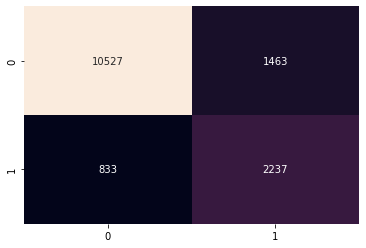

In [80]:
# Il y a 10527+2237 observations correctement expliquées par le modèle, le reste est mal prédit.
sns.heatmap(confusion_matrix(reglog.predict(X_test_sc),y_test), annot=True, fmt='d', cbar=False);

In [81]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=[f'predit {k}' for k in reglog.classes_],
             index = [f'vrai {k}' for k in reglog.classes_])

,predit <=50K,predit >50K
vrai <=50K,10527,833
vrai >50K,1463,2237


### On tente une pénalisation avec penalty = "l1"

In [82]:
reglog2 = LogisticRegression(solver = 'saga', penalty='l1', max_iter = 5000)

In [83]:
reglog2.fit(X_train_sc, y_train)

LogisticRegression(max_iter=5000, penalty='l1', solver='saga')

In [84]:
accuracy_score(reglog2.predict(X_test_sc),y_test)

0.847675962815405

Le score est légèrement supérieur à celui de la régression logistique sans pénalité et avec le solver par défaut.

### On essaye d'afficher la courbe ROC

In [85]:
probas = reglog.predict_proba(X_test_sc)
probas

array([[0.99688171, 0.00311829],
       [0.88691975, 0.11308025],
       [0.55590235, 0.44409765],
       ...,
       [0.32685143, 0.67314857],
       [0.70888644, 0.29111356],
       [0.2766865 , 0.7233135 ]])

In [86]:
score = reglog.decision_function(X_test_sc)
score

array([-5.76734703, -2.05965671, -0.22454818, ...,  0.72246034,
       -0.8899819 ,  0.96095763])

In [87]:
data = pd.DataFrame(probas, columns=['<=50K','>50K'])
data['score'] = score
data['revenus'] = y_test.values
data.head()

,<=50K,>50K,score,revenus
0,0.996882,0.003118,-5.767347,<=50K
1,0.886920,0.113080,-2.059657,<=50K
2,0.555902,0.444098,-0.224548,>50K
3,0.225873,0.774127,1.231763,>50K
4,0.995717,0.004283,-5.448863,<=50K


In [88]:

proba1 = reglog.predict_proba(X_test_sc)[:,1]
fpr, tpr, seuils = roc_curve(y_test, proba1, pos_label='>50K', drop_intermediate=False)

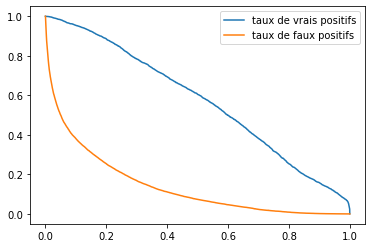

In [89]:
plt.plot(seuils[1:], tpr[1:], label='taux de vrais positifs')
plt.plot(seuils[1:], fpr[1:], label='taux de faux positifs')
plt.legend();

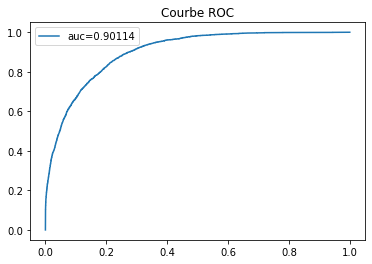

In [90]:

score_auc = auc(fpr[1:], tpr[1:])
fig, ax = plt.subplots()
ax.plot(fpr[1:], tpr[1:], label='auc=%1.5f' %score_auc)
ax.set_title("Courbe ROC")
ax.legend();

Le résultat de l'AUC est de 0,90. C'est correct.

In [91]:
# On peut aussi utiliser RFE pour sélection les variables : disons qu'on veut en garder en 25
rfe = RFE(estimator=LogisticRegression(solver='lbfgs', max_iter=500), n_features_to_select=25)
rfe = rfe.fit(X_train_sc, y_train)
col_rfe = X_train_sc.columns[rfe.support_]

In [92]:
#colonnes supprimées
X_train_sc.columns[~rfe.support_]

Int64Index([6, 8, 9, 12, 13, 24, 25, 28, 33], dtype='int64')

In [93]:
#On crée un jeu de données RFE avec uniquement les variables sélectionnées via RFE
X_train_rfe = X_train_sc[col_rfe]
X_test_rfe = X_test_sc[col_rfe]

In [94]:
reglog = LogisticRegression(solver='lbfgs', max_iter=500)
reglog.fit(X_train_rfe,y_train)
print(reglog.score(X_train_rfe,y_train), reglog.score(X_test_rfe,y_test))

0.8464779853346163 0.8476095617529881


Nous constations qu'il n'y a pas d'amélioration en utilisant la méthode RFE après la première régression logistique.

## Nous allons désormais faire un modèle SVM (support vector machines).

In [95]:
model = SVC()

param_grid = {
    'kernel' : ['linear', 'poly', 'rbf'], 
    'gamma' : ['auto', 'scale', 0.1, 0.001, 0.0001]
}
grid = GridSearchCV(model, param_grid, n_jobs=-1)

%time grid.fit(X_train_sc, y_train)
print(grid.best_params_)

CPU times: user 24 s, sys: 654 ms, total: 24.7 s
Wall time: 7min 56s
{'gamma': 'auto', 'kernel': 'rbf'}


Maintenant que nous avons trouvé le meilleur kernel et le meilleur gamma, nous affinons avec plusieurs valeurs de "C"

In [96]:
param_grid = {
    'C' : [ 10**k for k in range(-3,3)],
    'kernel' : ['rbf'], 
    'gamma' : ['auto']
}
grid = GridSearchCV(model, param_grid, n_jobs=-1)

%time grid.fit(X_train_sc, y_train)
print(grid.best_params_)

CPU times: user 22.9 s, sys: 249 ms, total: 23.1 s
Wall time: 19min 39s
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


### Un petit randomforest pour tester

In [97]:
param_grid = {
    'max_depth': [50, 100, 150],
    'n_estimators': [100, 500, 1000, 1500],
    'random_state' :[0]
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search_rfc.fit(X_train_sc, y_train)
print(classification_report(y_test, grid_search_rfc.predict(X_test_sc), zero_division=0))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .....max_depth=50, n_estimators=100, random_state=0; total time=   2.2s
[CV] END ....max_depth=50, n_estimators=1000, random_state=0; total time=  21.5s


/opt/homebrew/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .....max_depth=50, n_estimators=100, random_state=0; total time=   2.2s
[CV] END ....max_depth=50, n_estimators=1500, random_state=0; total time=  32.1s
[CV] END .....max_depth=50, n_estimators=100, random_state=0; total time=   2.2s
[CV] END ....max_depth=50, n_estimators=1500, random_state=0; total time=  32.2s
[CV] END .....max_depth=50, n_estimators=500, random_state=0; total time=  10.6s
[CV] END ....max_depth=50, n_estimators=1500, random_state=0; total time=16.4min
[CV] END .....max_depth=50, n_estimators=500, random_state=0; total time=  10.7s
[CV] END ....max_depth=100, n_estimators=100, random_state=0; total time=   2.1s
[CV] END ....max_depth=100, n_estimators=100, random_state=0; total time=   2.2s
[CV] END ....max_depth=100, n_estimators=500, random_state=0; total time=  10.3s
[CV] END ...max_depth=100, n_estimators=1000, random_state=0; total time=16.3min
[CV] END .....max_depth=50, n_estimators=500, random_state=0; total time=  11.1s
[CV] END ....max_depth=100, 

In [98]:
print(f"Meileurs paramètres sur le jeu d'entraînement {grid_search_rfc.best_params_}")

print("Accuracy de chacun des modèles :")
for res, params in zip(grid_search_rfc.cv_results_['params'], grid_search_rfc.cv_results_['mean_test_score']):
    print(f"pour les paramètres {res}, la précision du modèle est {params}")

Meileurs paramètres sur le jeu d'entraînement {'max_depth': 50, 'n_estimators': 1500, 'random_state': 0}
Accuracy de chacun des modèles :
pour les paramètres {'max_depth': 50, 'n_estimators': 100, 'random_state': 0}, la précision du modèle est 0.84312695425402
pour les paramètres {'max_depth': 50, 'n_estimators': 500, 'random_state': 0}, la précision du modèle est 0.8430937372238857
pour les paramètres {'max_depth': 50, 'n_estimators': 1000, 'random_state': 0}, la précision du modèle est 0.8436246317600924
pour les paramètres {'max_depth': 50, 'n_estimators': 1500, 'random_state': 0}, la précision du modèle est 0.8437573347532177
pour les paramètres {'max_depth': 100, 'n_estimators': 100, 'random_state': 0}, la précision du modèle est 0.8428283378427318
pour les paramètres {'max_depth': 100, 'n_estimators': 500, 'random_state': 0}, la précision du modèle est 0.8430605664294268
pour les paramètres {'max_depth': 100, 'n_estimators': 1000, 'random_state': 0}, la précision du modèle est 0.

In [99]:
param_grid = {
    'max_depth': [5, 20, 50],
    'n_estimators': [ 1000, 1500, 2000, 2500],
    'random_state' :[0]
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search_rfc.fit(X_train_sc, y_train)
print(classification_report(y_test, grid_search_rfc.predict(X_test_sc), zero_division=0))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...max_depth=100, n_estimators=1500, random_state=0; total time= 1.6min
[CV] END .....max_depth=5, n_estimators=2000, random_state=0; total time=  15.8s
[CV] END ....max_depth=20, n_estimators=1000, random_state=0; total time=17.7min
[CV] END ....max_depth=20, n_estimators=2500, random_state=0; total time= 6.6min
[CV] END ....max_depth=50, n_estimators=2000, random_state=0; total time= 1.1min
[CV] END ....max_depth=50, n_estimators=1000, random_state=0; total time=16.6min
[CV] END ....max_depth=150, n_estimators=100, random_state=0; total time=   2.2s
[CV] END ....max_depth=150, n_estimators=500, random_state=0; total time=  16.2s
[CV] END ...max_depth=150, n_estimators=1000, random_state=0; total time= 1.3min
[CV] END .....max_depth=5, n_estimators=1500, random_state=0; total time=  11.5s
[CV] END ....max_depth=20, n_estimators=1000, random_state=0; total time=17.5min
[CV] END ....max_depth=20, n_estimators=1500, ra

In [100]:
print(f"Meileurs paramètres sur le jeu d'entraînement {grid_search_rfc.best_params_}")

print("Accuracy de chacun des modèles :")
for res, params in zip(grid_search_rfc.cv_results_['params'], grid_search_rfc.cv_results_['mean_test_score']):
    print(f"pour les paramètres {res}, la précision du modèle est {params}")

Meileurs paramètres sur le jeu d'entraînement {'max_depth': 20, 'n_estimators': 2500, 'random_state': 0}
Accuracy de chacun des modèles :
pour les paramètres {'max_depth': 5, 'n_estimators': 1000, 'random_state': 0}, la précision du modèle est 0.8442881797512009
pour les paramètres {'max_depth': 5, 'n_estimators': 1500, 'random_state': 0}, la précision du modèle est 0.844487237543437
pour les paramètres {'max_depth': 5, 'n_estimators': 2000, 'random_state': 0}, la précision du modèle est 0.8446199603518517
pour les paramètres {'max_depth': 5, 'n_estimators': 2500, 'random_state': 0}, la précision du modèle est 0.844852208753836
pour les paramètres {'max_depth': 20, 'n_estimators': 1000, 'random_state': 0}, la précision du modèle est 0.8578919274512321
pour les paramètres {'max_depth': 20, 'n_estimators': 1500, 'random_state': 0}, la précision du modèle est 0.8579914398346089
pour les paramètres {'max_depth': 20, 'n_estimators': 2000, 'random_state': 0}, la précision du modèle est 0.857

## Validation croisée

In [101]:
models = {
    'rfc': RandomForestClassifier(max_depth= 20, n_estimators= 2500),
    'reglog2': LogisticRegression(solver = 'saga', penalty='l1',max_iter=5000),
    'svc': SVC(gamma='auto', C=1, kernel='rbf')
}

for k,v in models.items():
    model = v
    scores = cross_val_score(model, X_train_sc, y_train, cv=5)
    print(f'scores de validation croisée du modèle {k} : {scores} / score moyen : {np.mean(scores)}')

scores de validation croisée du modèle rfc : [0.85484406 0.85749834 0.85733245 0.86197744 0.85979758] / score moyen : 0.858289973376827
scores de validation croisée du modèle reglog2 : [0.84207034 0.83825481 0.84771068 0.85102853 0.85150158] / score moyen : 0.8461131885061792
[CV] END ....max_depth=150, n_estimators=100, random_state=0; total time=   2.4s
[CV] END ....max_depth=150, n_estimators=500, random_state=0; total time=  40.3s
[CV] END ...max_depth=150, n_estimators=1500, random_state=0; total time=  57.2s
[CV] END .....max_depth=5, n_estimators=1000, random_state=0; total time=   7.6s
[CV] END .....max_depth=5, n_estimators=2500, random_state=0; total time=17.6min
[CV] END ....max_depth=20, n_estimators=2000, random_state=0; total time= 1.5min
[CV] END ....max_depth=50, n_estimators=1500, random_state=0; total time= 6.0min
scores de validation croisée du modèle svc : [0.8450564  0.84389516 0.84654944 0.84887193 0.84685582] / score moyen : 0.8462457483681319


### Notre meilleur modèle testé est celui du RandomForestClassifier avec en paramètres max_depth= 20, n_estimators= 2500 pour un score moyen de 0,8582.